## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing

### Training Image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    "dataset/train/train/",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    "dataset/valid/valid/",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


### structure of training set (x=training example, y=label)

In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x, y in training_set:
    print(x)
    print(y)
    break # to show only the first.

tf.Tensor(
[[[[114.5  105.5  108.5 ]
   [117.25 108.25 111.25]
   [116.25 107.25 112.25]
   ...
   [127.5  122.5  129.5 ]
   [119.25 114.25 121.25]
   [131.75 126.75 133.75]]

  [[114.   105.   108.  ]
   [114.   105.   108.  ]
   [116.5  107.5  112.5 ]
   ...
   [130.75 125.75 132.75]
   [133.   128.   135.  ]
   [128.25 123.25 130.25]]

  [[116.5  107.5  110.5 ]
   [116.75 107.75 110.75]
   [117.75 108.75 113.75]
   ...
   [127.75 122.75 129.75]
   [121.   116.   123.  ]
   [125.25 120.25 127.25]]

  ...

  [[132.75 136.75 145.75]
   [130.5  134.5  143.5 ]
   [134.25 138.25 147.25]
   ...
   [146.   150.   159.  ]
   [149.5  153.5  162.5 ]
   [140.   144.   153.  ]]

  [[132.   136.   145.  ]
   [131.   135.   144.  ]
   [134.75 138.75 147.75]
   ...
   [148.25 152.25 161.25]
   [144.25 148.25 157.25]
   [148.   152.   161.  ]]

  [[129.   133.   142.  ]
   [128.5  132.5  141.5 ]
   [130.5  134.5  143.5 ]
   ...
   [143.75 147.75 156.75]
   [155.5  159.5  168.5 ]
   [139.75 143.75 15

## Building Model

### Avoiding Overshotting
#### 1. Choose small learning rate default 0.001, we are using 0.0001.
#### 2. There may be a chance of underfitting, so increase the number of neurons.
#### 3. Add more Convulution layer to extract more features from images. Incase model is unable to capture relevant feature or model is confusing due to lack of feature, so feed with more features.

In [6]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [7]:
# Model object
model = Sequential()

### Building Convulution Layer

In [8]:
# convulution layer 32
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

c:\Users\DELL\Documents\my progamming folder\Projects\AI-Crop-Disease-Detection\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# convulution layer 64
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [10]:
# convulution layer 128
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [11]:
# convulution layer 256
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [12]:
# convulution layer 512
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [13]:
model.add(Dropout(0.25)) # to avoid overfitting

In [14]:
# flatten to feed to neural network
model.add(Flatten())

In [15]:
model.add(Dense(units=1500, activation='relu')) # units = neurons

In [16]:
model.add(Dropout(0.4)) # to avoid overfitting

#### Output Layer

In [17]:
model.add(Dense(units=38, activation='softmax'))

### Compiling Model

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## Training Model

In [ ]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

### record history (save to json file)

In [ ]:
import json

with open("train_hist.json", 'w') as fl:
    json.dump(training_history.history, fl)

### Save model in keras format

In [ ]:
model.save('trained_model.keras')

## Model Evaluation

### load saved model

In [20]:
filepath = "trained_model.keras"
l_model = tf.keras.models.load_model(filepath, custom_objects=None, compile=True, safe_mode=True)

c:\Users\DELL\Documents\my progamming folder\Projects\AI-Crop-Disease-Detection\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 26 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [21]:
# evalution on training set
train_loss, train_acc = l_model.evaluate(training_set)
train_acc, train_loss

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1432s 650ms/step - accuracy: 0.9918 - loss: 0.0267


(0.991919755935669, 0.02569156140089035)

In [22]:
# evalution on validation set
val_loss, val_acc = l_model.evaluate(validation_set)
val_acc, val_loss

550/550 ━━━━━━━━━━━━━━━━━━━━ 368s 665ms/step - accuracy: 0.9677 - loss: 0.1127


(0.9683018326759338, 0.11025995761156082)

### Accuracy visualization

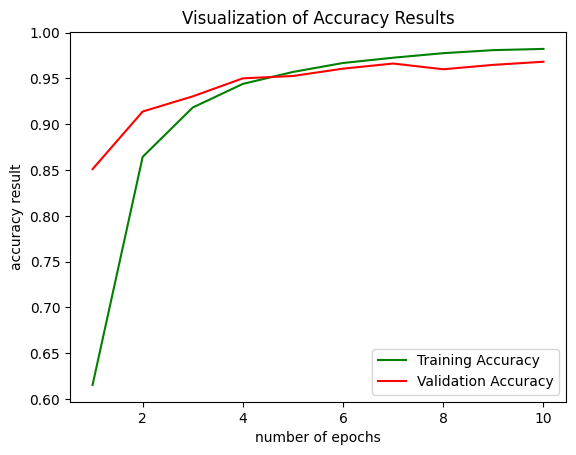

In [25]:
# fetch training history
import json
with open("train_hist.json", 'r') as fl:
    training_hist = json.load(fl)

epochs = [i for i in range(1, 11)]
# use matplotlib to plot
plt.plot(epochs, training_hist['accuracy'], color='green', label='Training Accuracy')
plt.plot(epochs, training_hist['val_accuracy'], color='red', label='Validation Accuracy')
plt.xlabel('number of epochs')
plt.ylabel('accuracy result')
plt.title('Visualization of Accuracy Results')
plt.legend()
plt.show()

### Some other metrics for evaluation, using precision and recall calculation

In [26]:
class_name = training_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

#### test set

In [27]:
test_set = tf.keras.utils.image_dataset_from_directory(
    "dataset/valid/valid/",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


#### prediction

In [28]:
y_pred = l_model.predict(test_set)
y_pred

550/550 ━━━━━━━━━━━━━━━━━━━━ 311s 565ms/step


array([[1.00000000e+00, 1.45390366e-08, 4.07291145e-11, ...,
        7.48156574e-18, 3.82512217e-16, 3.56593840e-15],
       [9.99940515e-01, 5.76797029e-05, 1.75062702e-08, ...,
        1.04585752e-12, 2.86260182e-11, 1.01131527e-10],
       [1.00000000e+00, 1.52737325e-08, 8.07024314e-09, ...,
        7.63079277e-16, 3.92605260e-14, 1.84857988e-12],
       ...,
       [5.99205130e-09, 1.41127457e-10, 9.91842342e-08, ...,
        2.75185361e-11, 3.21076256e-11, 9.99996901e-01],
       [1.14904104e-07, 6.85333942e-11, 4.15314574e-08, ...,
        4.63031974e-10, 1.38076828e-10, 9.99994278e-01],
       [3.85833021e-13, 1.25531066e-15, 5.70538679e-13, ...,
        1.09634869e-13, 2.01557313e-11, 9.99824941e-01]], dtype=float32)

In [29]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [30]:
true_categories = tf.concat([y for _,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [31]:
y_true = tf.argmax(true_categories, axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

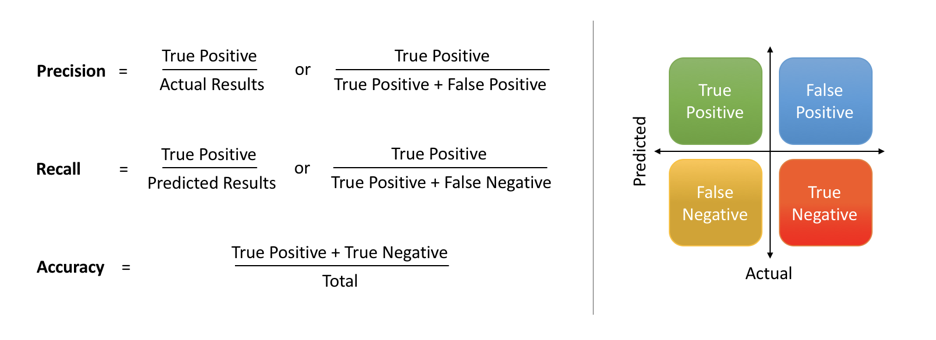

#### classification report

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
cr = classification_report(y_true=y_true, y_pred=predicted_categories, target_names=class_name)
print(cr)

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.97      0.97       504
                                 Apple___Black_rot       0.99      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.99      1.00      0.99       440
                                   Apple___healthy       0.99      0.90      0.94       502
                               Blueberry___healthy       0.98      0.95      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.98      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.92      0.94       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.97      0.

#### Confusion matrix visualization

In [34]:
cm = confusion_matrix(y_true=y_true, y_pred=predicted_categories)
cm

array([[490,   2,   0, ...,   0,   0,   0],
       [  0, 491,   1, ...,   0,   0,   0],
       [  0,   0, 439, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 487,   0,   0],
       [  0,   0,   0, ...,   0, 442,   0],
       [  0,   0,   0, ...,   0,   0, 472]], dtype=int64)

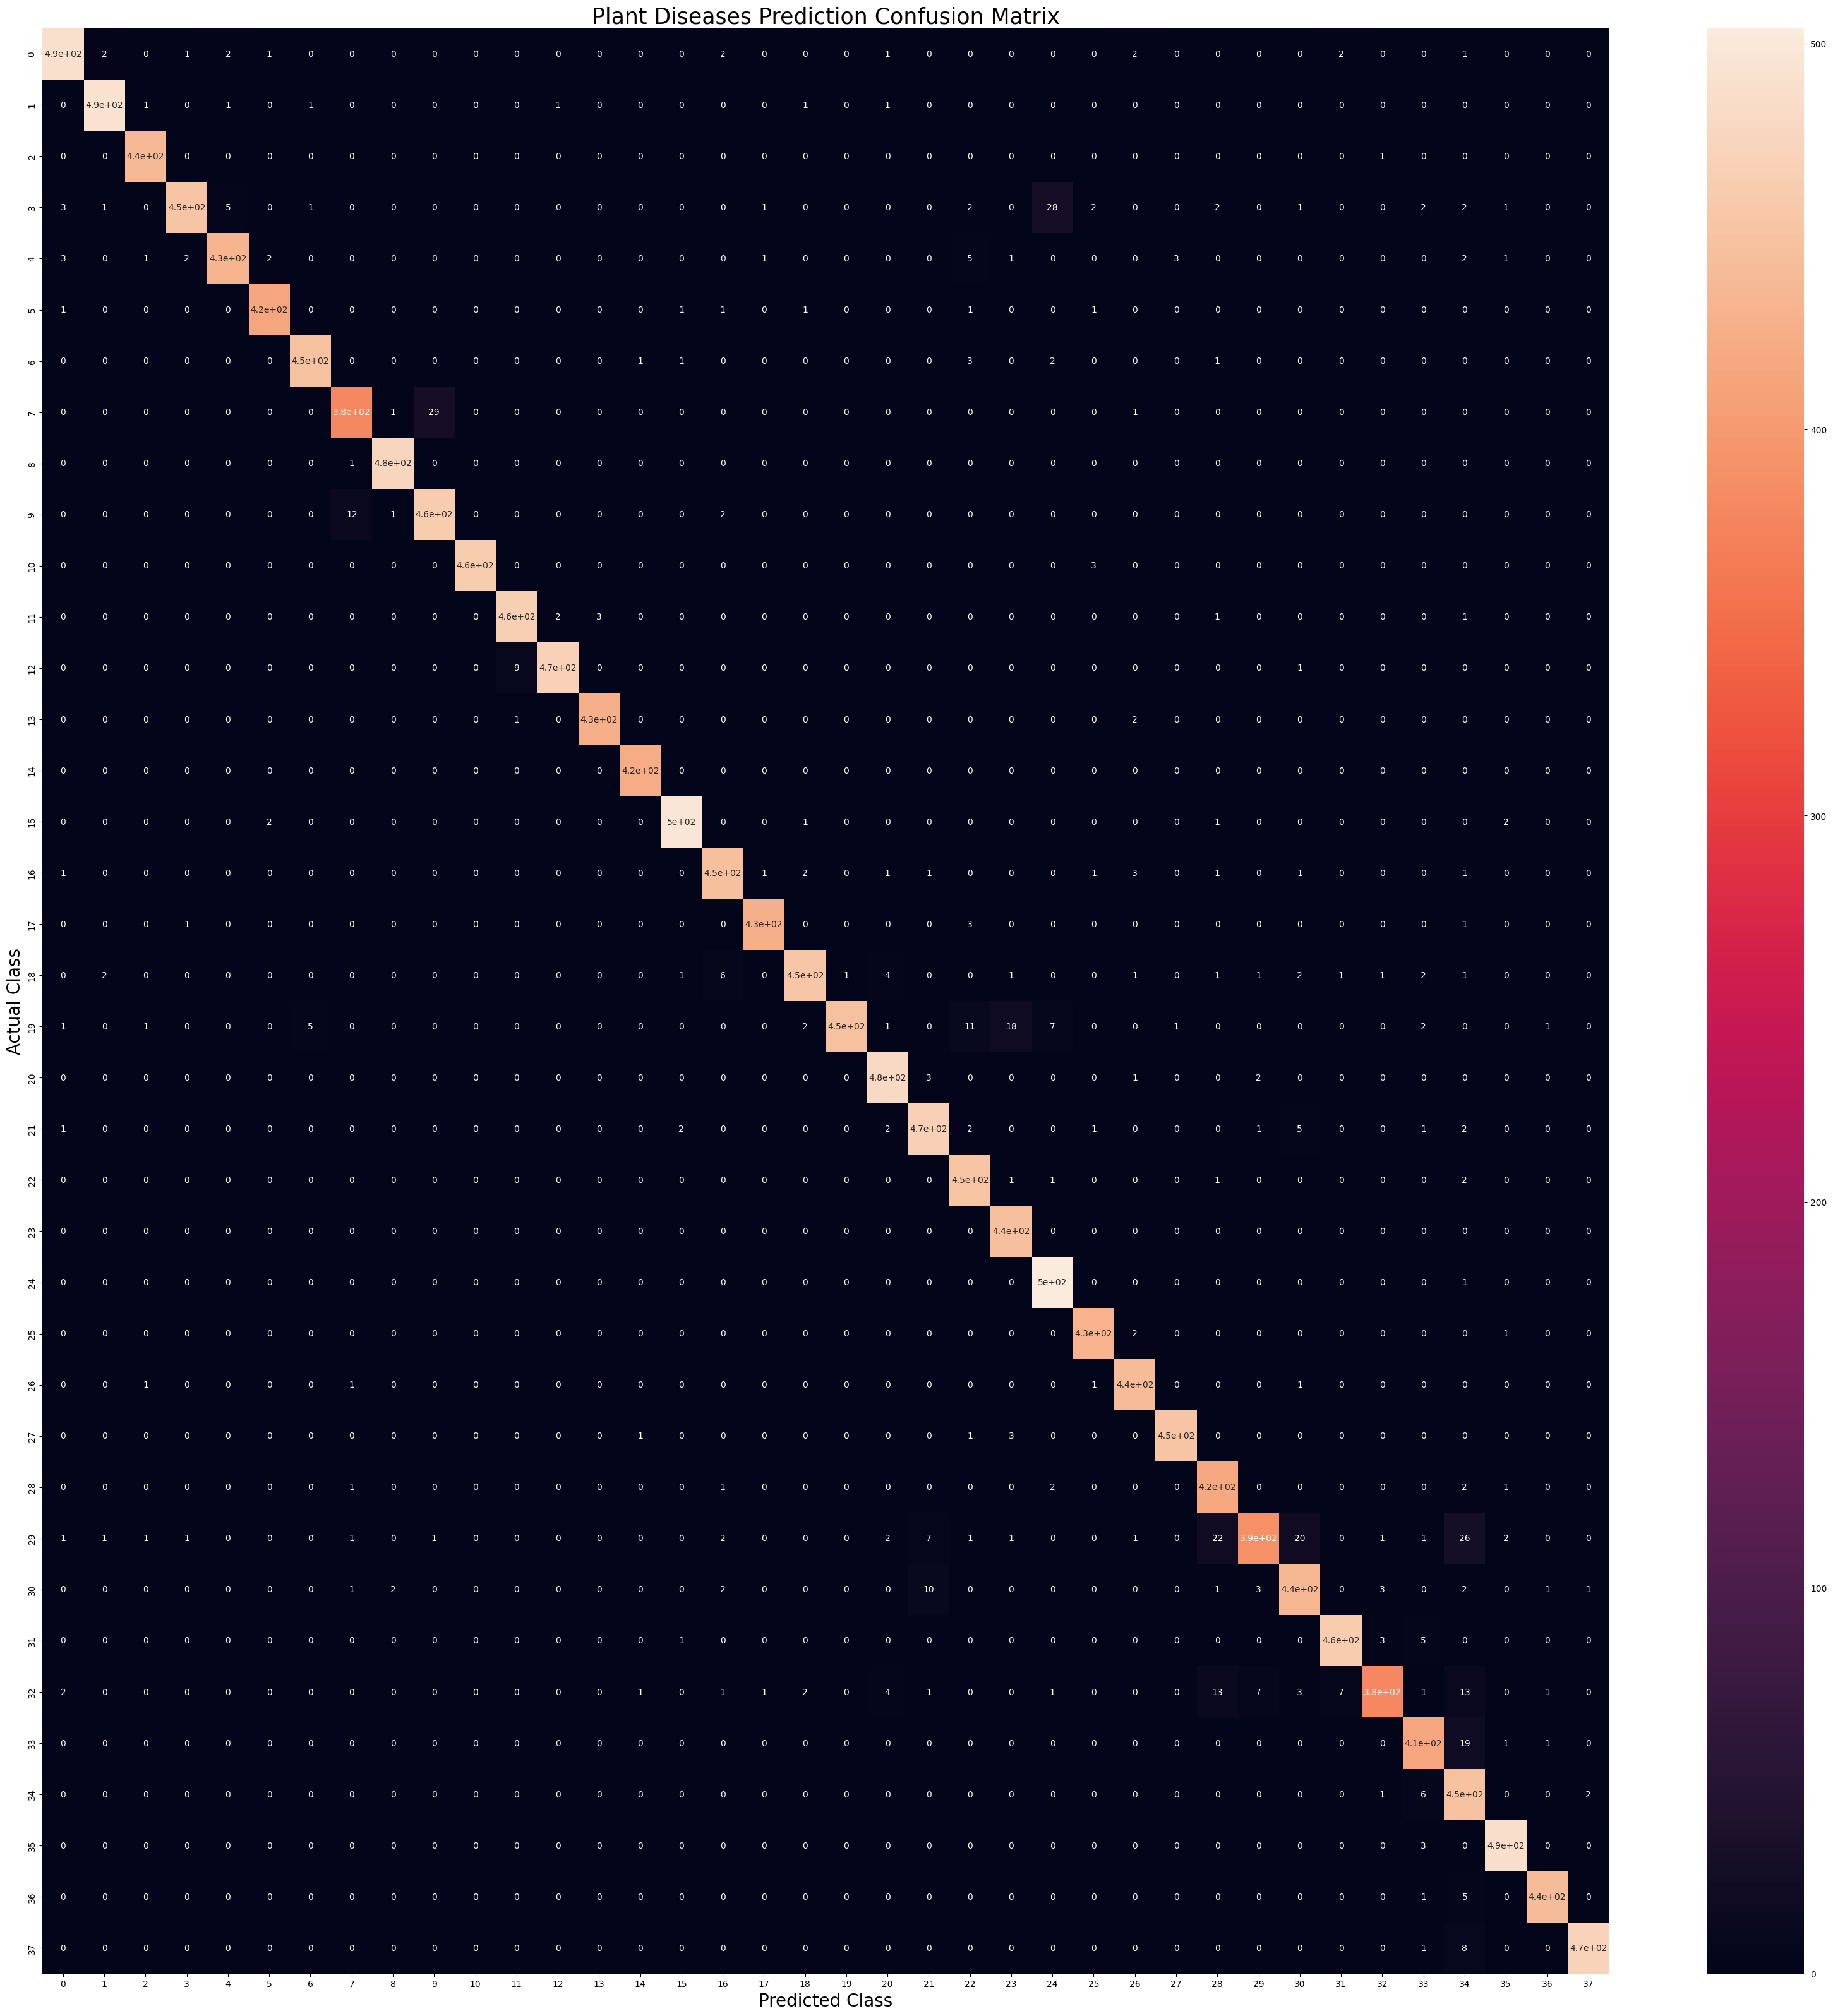

In [35]:
plt.figure(figsize=(40,40))
sns.heatmap(cm, annot=True, annot_kws={"size": 10})
plt.xlabel('Predicted Class', fontsize=20)
plt.ylabel('Actual Class', fontsize=20)
plt.title('Plant Diseases Prediction Confusion Matrix', fontdict={'size': 25})
plt.show()